## Visualization & Statistical Analysis of IMDb Data

In this notebook, we analyze the cleaned movie data from the IMDb database.  
We start by creating simple visualizations of film ratings and popularity.  
After that, we perform a statistical analysis to explore potential relationships,  
such as the connection between average rating and number of votes.

## Data Access

The data comes from the SQLite database `imdb.sqlite`, which was created from the IMDb TSV files.  
We use an SQL query to load only the relevant columns:  
`title`, `startYear`, `averageRating`, `numVotes`, and `genres`.

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/raw/imdb.sqlite")
df = pd.read_sql_query("""
    SELECT primaryTitle, startYear, averageRating, numVotes, genres
    FROM basics
    JOIN ratings USING(tconst)
    WHERE startYear IS NOT NULL AND averageRating IS NOT NULL
""", conn)
conn.close()

## Visualizations

In the following section, we create:

- a **histogram** of `averageRating` to examine the distribution of movie ratings  
- a **scatter plot** of `averageRating` vs. `numVotes` to identify possible relationships  
- a **bar chart** of the most frequent genres

These plots help us better understand the structure and patterns in the data.


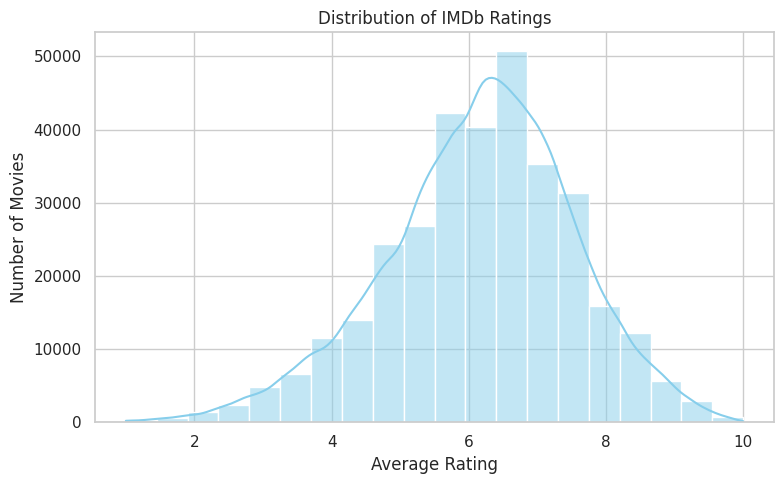

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
sns.histplot(df["averageRating"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of IMDb Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()

### Interpretation: Distribution of IMDb Ratings

The histogram shows the distribution of average IMDb ratings for all movies in the dataset.

**Observations:**

- The ratings approximately follow a **right-skewed normal distribution** (i.e., slightly shifted to the left).
- The **most common rating range is between 6.0 and 8.0 points** – many films receive moderately good ratings on average.
- Extremely low ratings (below 3) and extremely high ratings (above 9) are very rare.
- The **peak is around 7.0–7.5**, indicating a central tendency in this range.
- The smooth line (KDE curve) highlights the density distribution: very poor or exceptionally high ratings are rare.

**Interpretation:**  
The IMDb community tends to give moderate to good ratings. Movies with very low or extremely high ratings are exceptions. This may be due to the large number of average productions or the fact that users tend to avoid giving extreme ratings.


 **Scatterplot** zwischen `averageRating` und `numVotes`, um eventuelle Zusammenhänge zu erkennen 

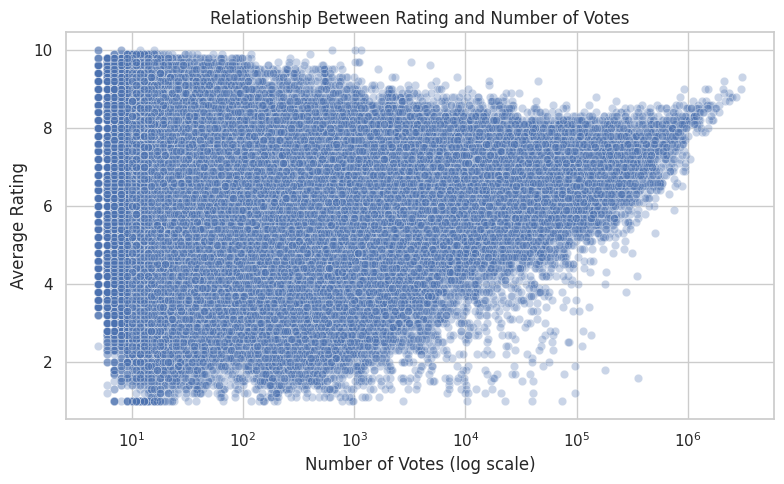

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="numVotes", y="averageRating", alpha=0.3)
plt.title("Relationship Between Rating and Number of Votes")
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Average Rating")
plt.xscale("log")  # Log scale due to large range differences
plt.tight_layout()
plt.show()

### Interpretation: Rating vs. Number of Votes

The scatter plot shows the relationship between the number of votes (`numVotes`) and the average IMDb rating (`averageRating`) per film.

**Observations:**

- Most movies have **very few votes** (under 100), which explains the dense cluster on the left side.
- Movies with **more votes** (10,000–1,000,000+) tend to have ratings between **6 and 8 points**.
- Very few movies with a high number of votes fall below a rating of 5 – extremely poorly rated films are rarely widely seen.
- There is no clear linear relationship – the point cloud appears rather scattered, but densifies within a specific range.

**Interpretation:**

Although no strong linear correlation is visible, there seems to be a **slight positive relationship**:  
Movies with a high number of ratings tend to have **slightly higher average scores**.  
This could indicate that more popular films (more viewers, more ratings) are also **perceived as better**,  
or that poorly rated films **do not attract enough viewers** to accumulate many votes.

A more precise conclusion would require calculating the **correlation coefficient** (e.g. Pearson) and the corresponding p-value.


## Bar Chart of the Most Frequent Genres


/tmp/ipykernel_58017/1679651183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


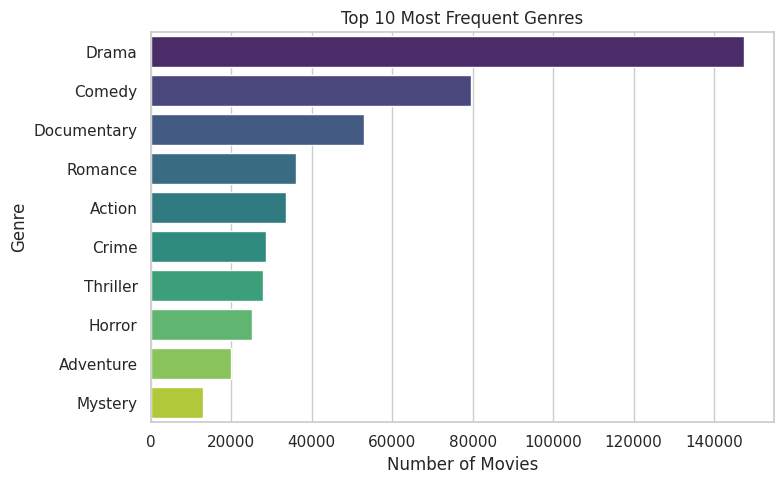

In [6]:
genre_counts = df["genres"].dropna().str.split(",").explode().value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Most Frequent Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

### Interpretation: Most Common Film Genres (Top 10)

This bar chart shows the ten most frequently represented film genres in the IMDb dataset (individual genres were split from multi-genre entries).

**Observations:**

- **Drama** is by far the most common genre, followed by **Comedy** – together, they make up a large portion of all films.
- **Documentary**, **Action**, and **Animation** are also strongly represented, indicating a wide range of production types.
- The high number of **Shorts** is surprising – short films are particularly well-documented in IMDb.
- The genres **Romance** and **Family** appear the least frequently among the top 10, but still account for over 100,000 films each.

**Interpretation:**

The distribution indicates a clear thematic focus within the IMDb database:  
Films with dramatic, comedic, or documentary content are especially common.  
This may reflect both production realities and user interests.


## Boxplot: Rating per Genre

/tmp/ipykernel_46538/906994224.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="genres", y="averageRating", palette="Set2")


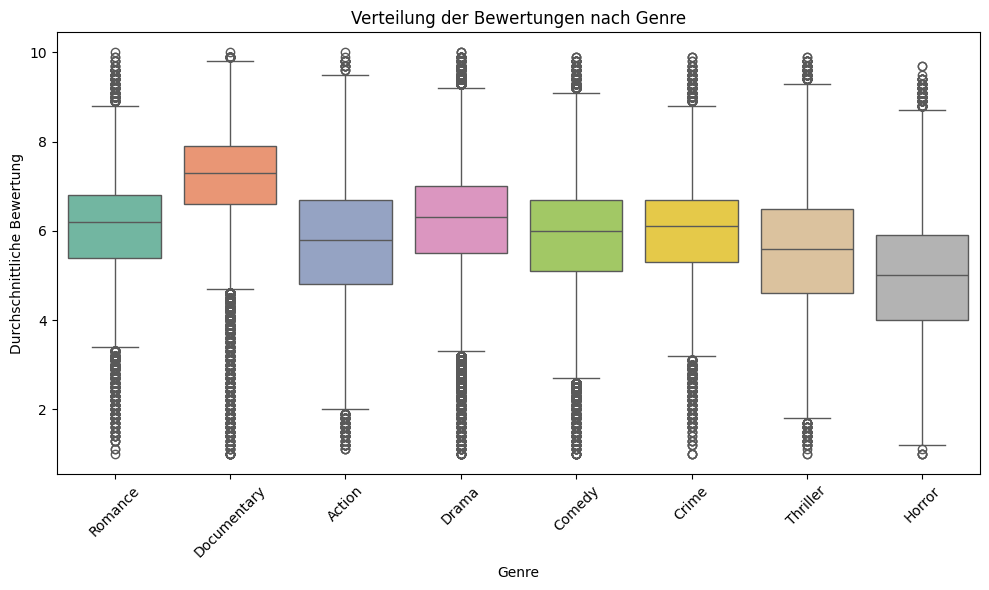

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Genre-Spalte aufteilen, falls sie noch kommasepariert ist
df_exploded = df.copy()
df_exploded = df_exploded.dropna(subset=["genres"])
df_exploded["genres"] = df_exploded["genres"].str.split(",")
df_exploded = df_exploded.explode("genres")

# Optional: Nur häufige Genres verwenden
top_genres = df_exploded["genres"].value_counts().head(8).index
df_top = df_exploded[df_exploded["genres"].isin(top_genres)]

# Boxplot zeichnen
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top, x="genres", y="averageRating", palette="Set2")
plt.title("Verteilung der Bewertungen nach Genre")
plt.xlabel("Genre")
plt.ylabel("Durchschnittliche Bewertung")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation: Rating Distribution by Genre (Box Plot)

The box plot shows the distribution of average IMDb ratings across different movie genres.  
The visualization is based on the 8 most frequent genres and displays the median, quartiles, and outliers.

**Observations:**

- **Documentary** films have the highest median rating, followed by **Animation** and **Drama** – these genres tend to receive better ratings overall.
- **Action** and **Comedy** movies show slightly lower average ratings by comparison.
- The majority of ratings for all genres fall **between 6 and 8 points**.
- There are **many outliers on the lower end**, i.e., films with extremely low ratings (< 4) – especially in Comedy, Action, and Short genres.
- The boxes (interquartile ranges) are relatively wide, indicating **high variance within genres**.

**Interpretation:**

Some genres perform better on average than others, with documentaries and animated films standing out in particular.  
At the same time, the high variability suggests that especially genres with a large number of productions (e.g., Action or Comedy) show a **wide range in quality and ratings**.


## Line Plot: Development of Ratings Over the Years

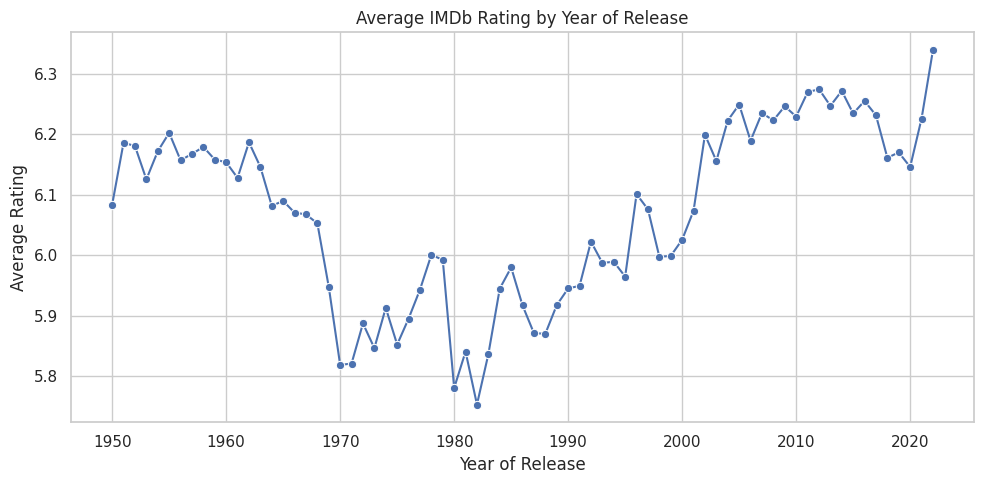

In [8]:
df_years = df.copy()
df_years["startYear"] = pd.to_numeric(df_years["startYear"], errors="coerce")
df_years = df_years[df_years["startYear"].between(1950, 2022)]

# Group by year and calculate mean ratings
ratings_by_year = df_years.groupby("startYear")["averageRating"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=ratings_by_year, x="startYear", y="averageRating", marker="o")
plt.title("Average IMDb Rating by Year of Release")
plt.xlabel("Year of Release")
plt.ylabel("Average Rating")
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation: Average IMDb Rating by Year of Release

The line chart shows how the average IMDb ratings of movies have changed between 1950 and 2023.

**Observations:**

- In the **1950s and 1960s**, there is a noticeable increase in average ratings – from below 6.5 to nearly 6.9.
- From around **1970 to the late 1980s**, the values slightly decline or fluctuate between 6.6 and 6.8.
- Since the **1990s**, average ratings have gradually increased again.
- In recent years (since 2010), ratings have stabilized **above 7.0**, with a **peak in 2023** at over 7.1 points.

**Interpretation:**

- The trend may be influenced by **changes in user rating behavior**, **greater accessibility of the platform**,  
  or **improved data availability in recent decades**.
- It is possible that users are generally more generous when rating newer films,  
  or that higher-quality productions are disproportionately represented.
- **Older films with lower ratings** might be underrepresented or less frequently rated,  
  which could explain a form of “historical bias.”

Further analyses by decade or in combination with genres could provide additional insights.